In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# 데이터 로드

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Jeju_dacon/train.csv')
trade = pd.read_csv('/content/drive/MyDrive/Jeju_dacon/international_trade.csv')

In [136]:
df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [137]:
trade

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
...,...,...,...,...,...,...,...
1269,2023-02,포포(papaw)[파파야(papaya)],0,0,23830,71,-71
1270,2023-02,사과,135165,351,0,0,351
1271,2023-02,배,2206012,5411,1,0,5411
1272,2023-02,신 체리[프루너스 체라서스(Prunus cerasus)],5,0,0,0,0


In [138]:
df.isnull().sum()

ID             0
timestamp      0
item           0
corporation    0
location       0
supply(kg)     0
price(원/kg)    0
dtype: int64

In [139]:
df['item'].value_counts()

TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: item, dtype: int64

In [140]:
unique_items = trade['품목명'].unique()
print(unique_items)

['토마토(신선한 것이나 냉장한 것으로 한정한다)' '양파' '쪽파' '꽃양배추와 브로콜리(broccoli)' '방울다다기 양배추'
 '양배추' '결구(結球) 상추'
 '위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Cichorium intybus var. foliosum)]'
 '당근' '오이류(신선한 것이나 냉장한 것으로 한정한다)' '콩[비그나(Vigna)속ㆍ파세러스(Phaseolus)속)]'
 '대추야자' '무화과' '파인애플' '망고(mango)' '망고스틴(mangosteen)' '오렌지' '감귤'
 '그레이프프루트(grapefruit)와 포멜로(pomelo)'
 '레몬[시트러스 리몬(Citrus limon)ㆍ시트러스 리머늄(Citrus limonum)]' '수박'
 '포포(papaw)[파파야(papaya)]' '사과' '배' '자두' '완두[피섬 새티범(Pisum sativum)]'
 '구아바(guava)' '살구' '신 체리[프루너스 체라서스(Prunus cerasus)]'
 '복숭아[넥터린(nectarine)을 포함한다]' '순무' '방울토마토' '샬롯(shallot)' '참외']


TG : 감귤
BC : 브로콜리
RD : 무
CR : 당근
CB : 양배추

필요없는 품목 삭제

In [141]:
selected_items = ['감귤', '브로콜리', '무', '당근', '양배추']
filtered_trade = trade[trade['품목명'].str.contains('|'.join(selected_items))]

# 결과 출력
print(filtered_trade)

           기간                   품목명   수출 중량  수출 금액    수입 중량  수입 금액  무역수지
3     2019-01  꽃양배추와 브로콜리(broccoli)     160      1   638913    563  -562
4     2019-01             방울다다기 양배추       0      0     7580     38   -38
5     2019-01                   양배추  184650     94   395802     90     4
8     2019-01                    당근   23150     22  7466150   2955 -2934
12    2019-01                   무화과    2627     23    94529    464  -441
...       ...                   ...     ...    ...      ...    ...   ...
1250  2023-02                   양배추   13188     13   377456    104   -91
1253  2023-02                    당근   22510     20  9260020   3758 -3737
1254  2023-02                    순무    4000      4        2      0     4
1258  2023-02                   무화과    1319     14   104566    454  -440
1264  2023-02                    감귤    6895     34    27765     98   -64

[306 rows x 7 columns]


In [142]:
unique_items = filtered_trade['품목명'].unique()
print(unique_items)

['꽃양배추와 브로콜리(broccoli)' '방울다다기 양배추' '양배추' '당근' '무화과' '감귤' '순무']


In [143]:
# '품목명'이 '무화과'인 행 삭제
filtered_trade = filtered_trade[filtered_trade['품목명'] != '무화과']

In [144]:
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [145]:
!pip install matplotlib

# train.csv

# 박스플롯

<Axes: xlabel='item', ylabel='price(원/kg)'>

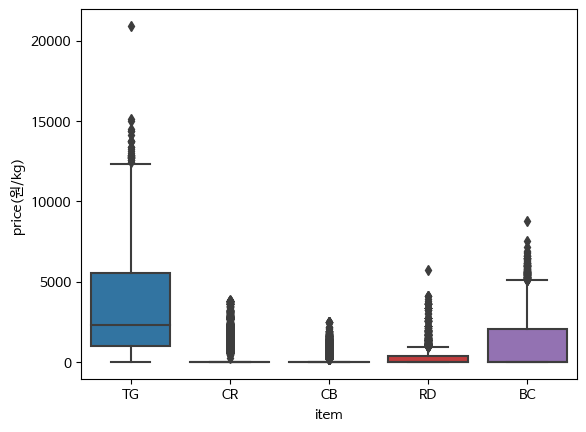

In [146]:
import seaborn as sns
sns.boxplot(x='item',y='price(원/kg)',data=df)

<Axes: xlabel='corporation', ylabel='price(원/kg)'>

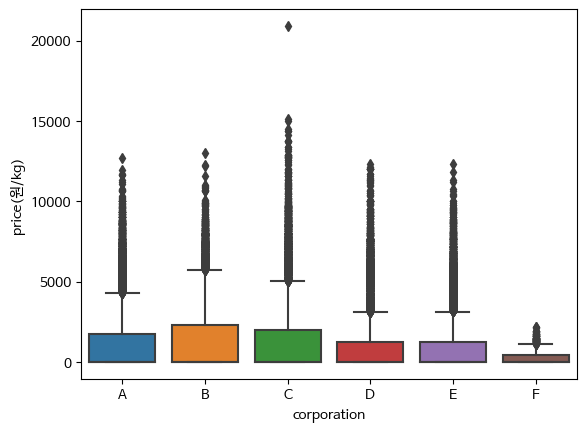

In [147]:
sns.boxplot(x='corporation',y='price(원/kg)',data=df)

<Axes: xlabel='location', ylabel='price(원/kg)'>

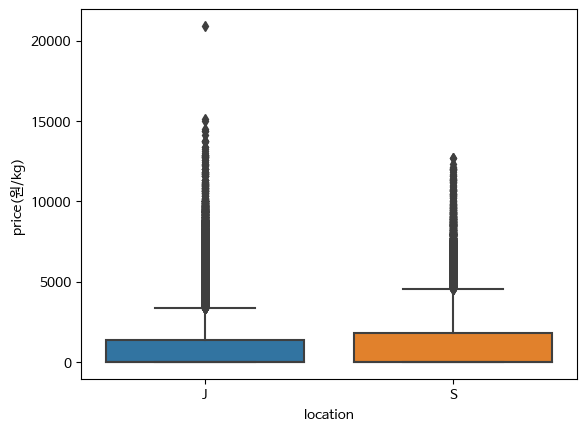

In [148]:
sns.boxplot(x='location',y='price(원/kg)',data=df)

# 산점도

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

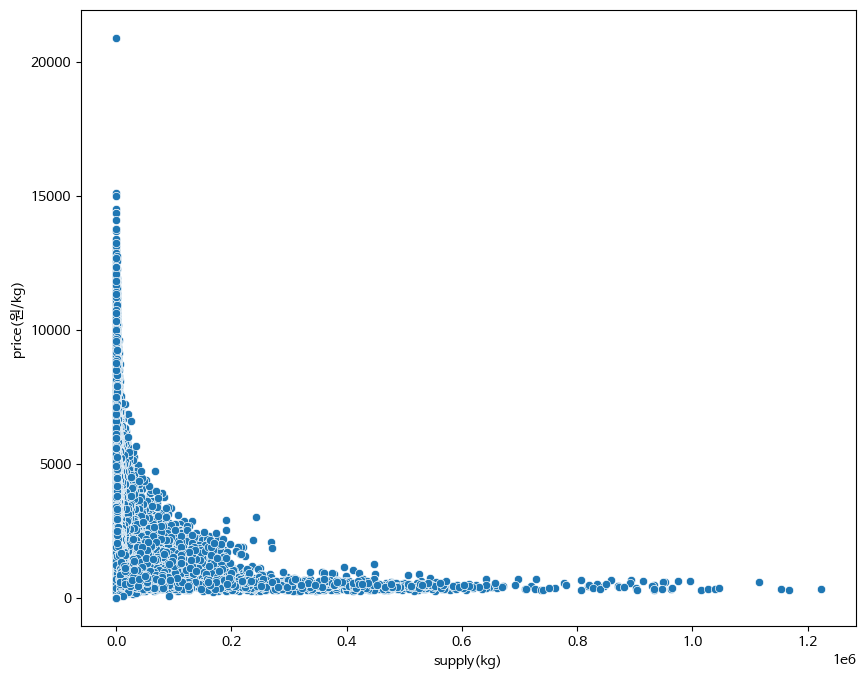

In [149]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x ='supply(kg)',y='price(원/kg)')

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

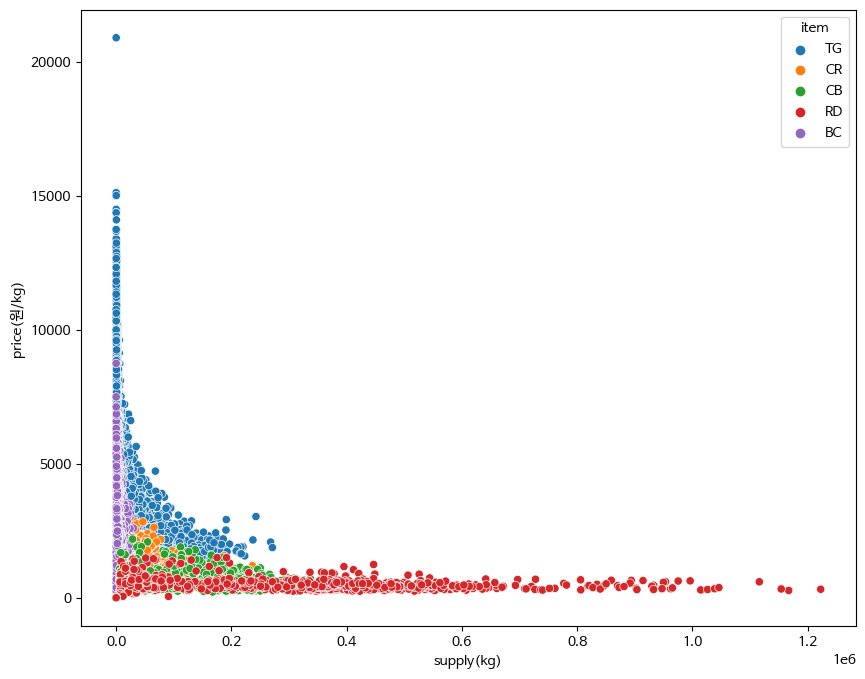

In [150]:
# item 품목별 색상 다르게 설정
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x ='supply(kg)',y='price(원/kg)',hue='item')

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

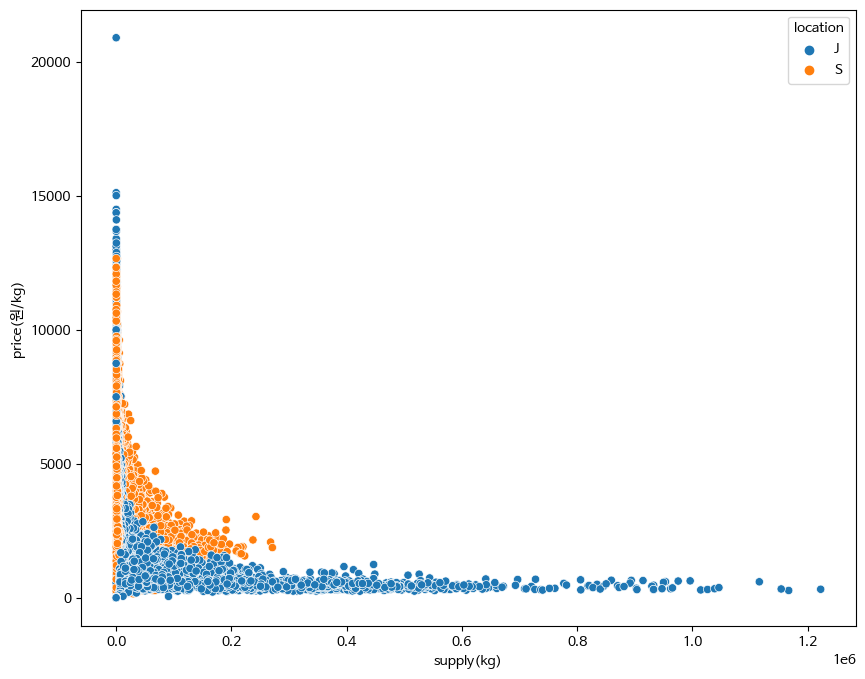

In [151]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x ='supply(kg)',y='price(원/kg)',hue='location')

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

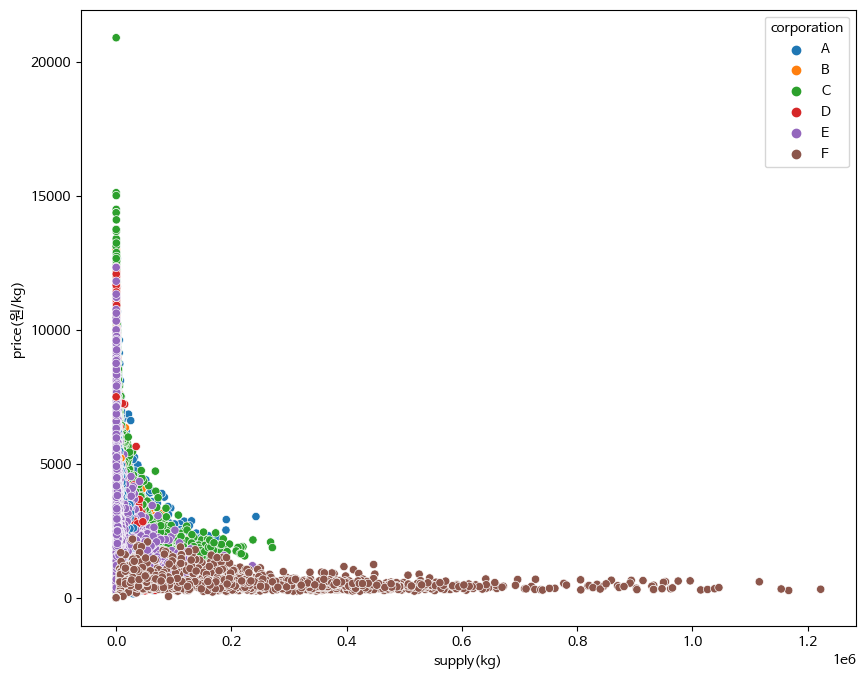

In [152]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x ='supply(kg)',y='price(원/kg)',hue='corporation')

In [153]:
items = df['item'].value_counts().index.to_list()

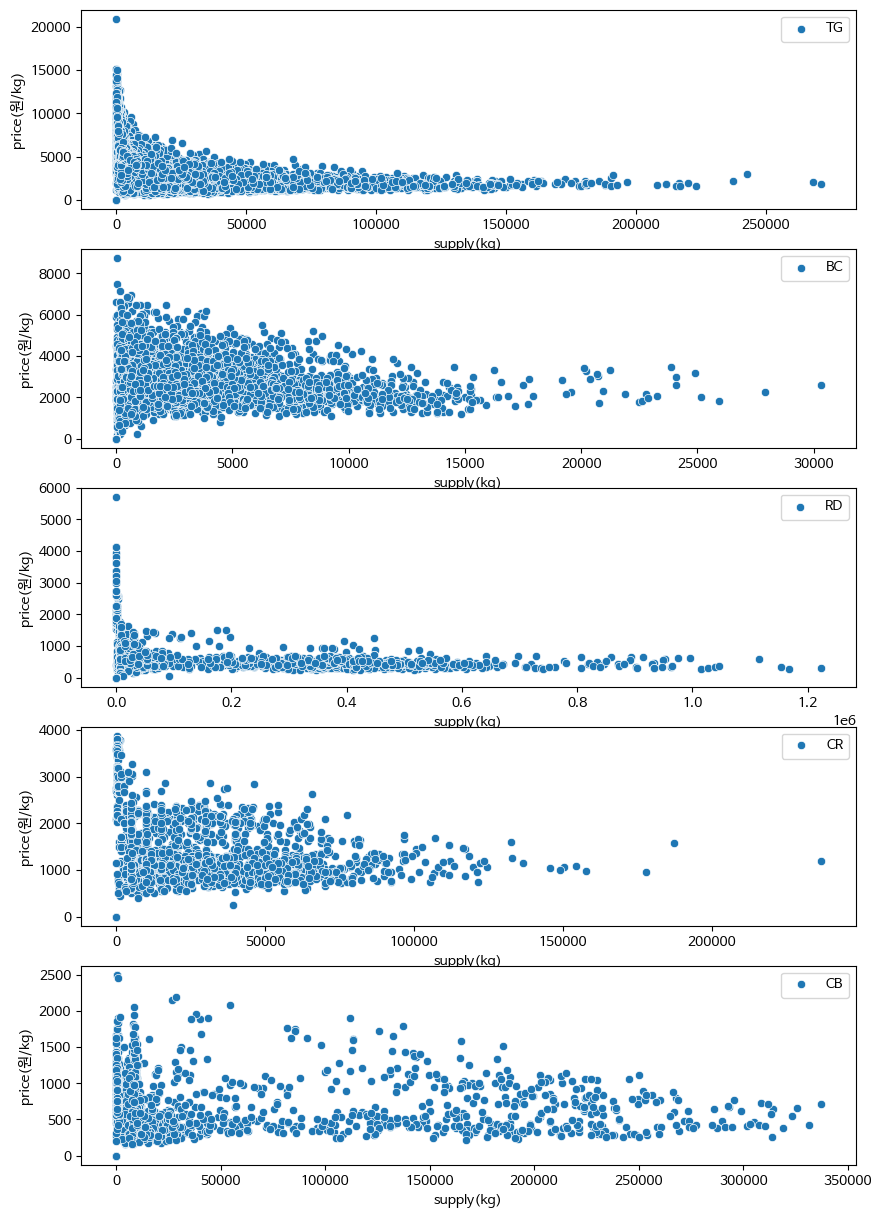

In [154]:
fig, axes = plt.subplots(5,1,figsize=(10,15))
for i in range(len(items)):
    r = i%5
    sns.scatterplot(data = df[df['item']==items[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[r],label=items[i])

In [155]:
corporation = df['corporation'].value_counts().index.to_list()

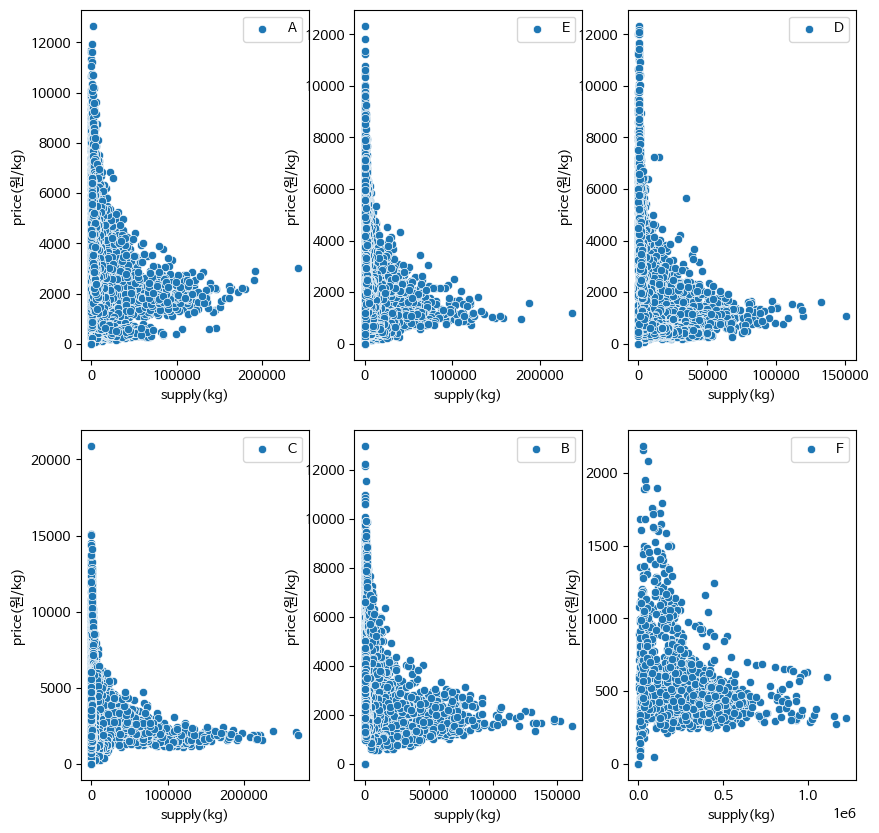

In [156]:
fig, axes = plt.subplots(2,3,figsize=(10,10))
for i in range(len(corporation)):
    n=int(i/3)
    r = i%3
    sns.scatterplot(data = df[df['corporation']==corporation[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[n][r],label=corporation[i])

supply가 0인 경우가 몰려있음

In [157]:
loc = df['location'].value_counts().index.to_list()

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

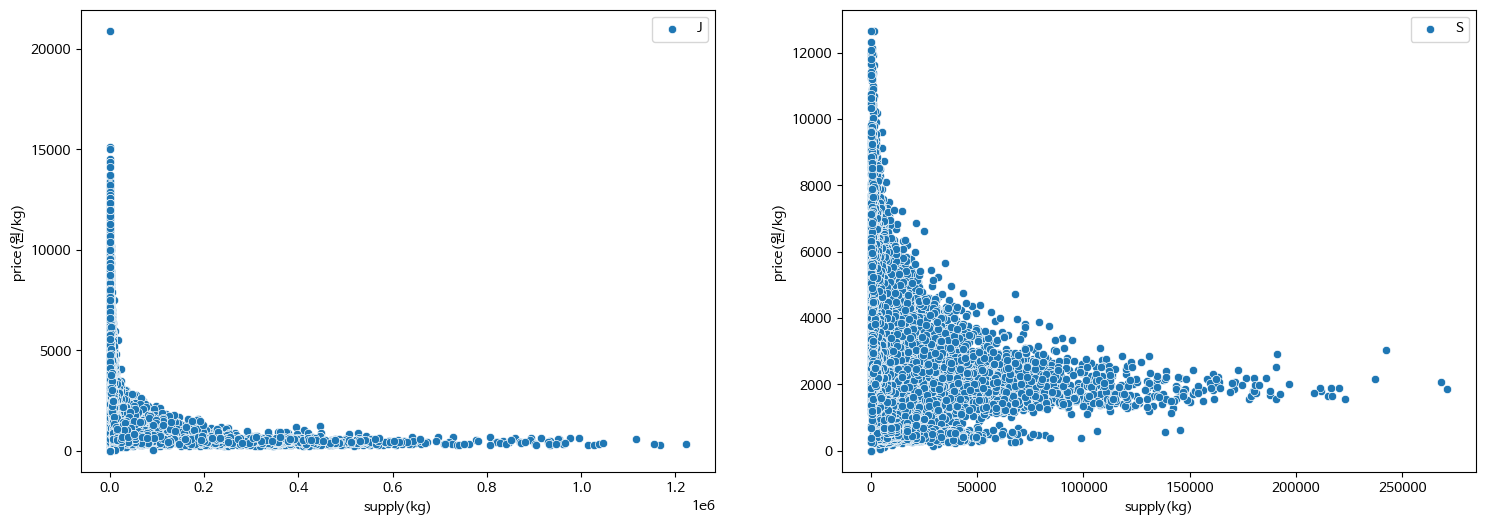

In [158]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(data = df[df['location']==loc[0]], x = 'supply(kg)',y='price(원/kg)',label=loc[0],ax = axes[0])
sns.scatterplot(data = df[df['location']==loc[1]], x = 'supply(kg)',y='price(원/kg)',label=loc[1],ax = axes[1])

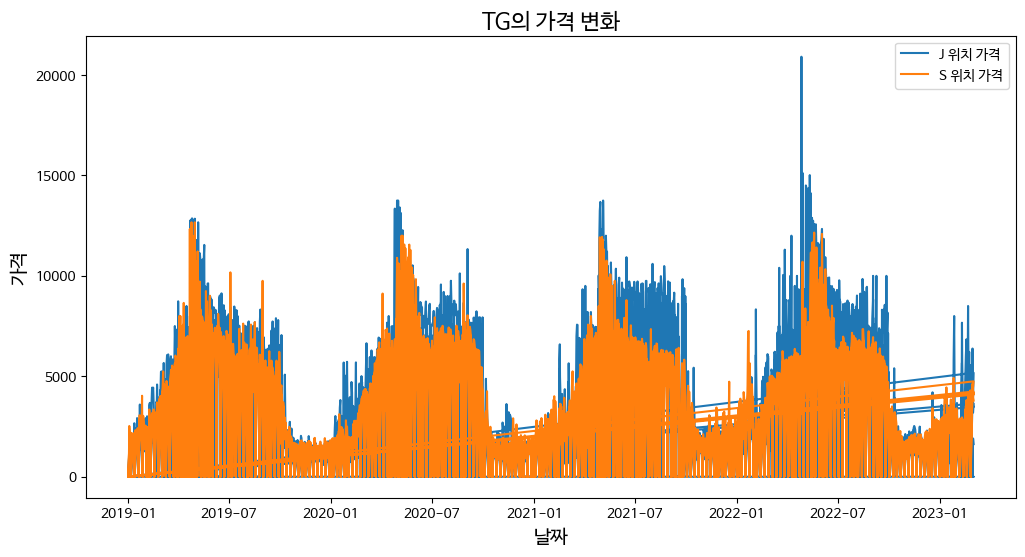

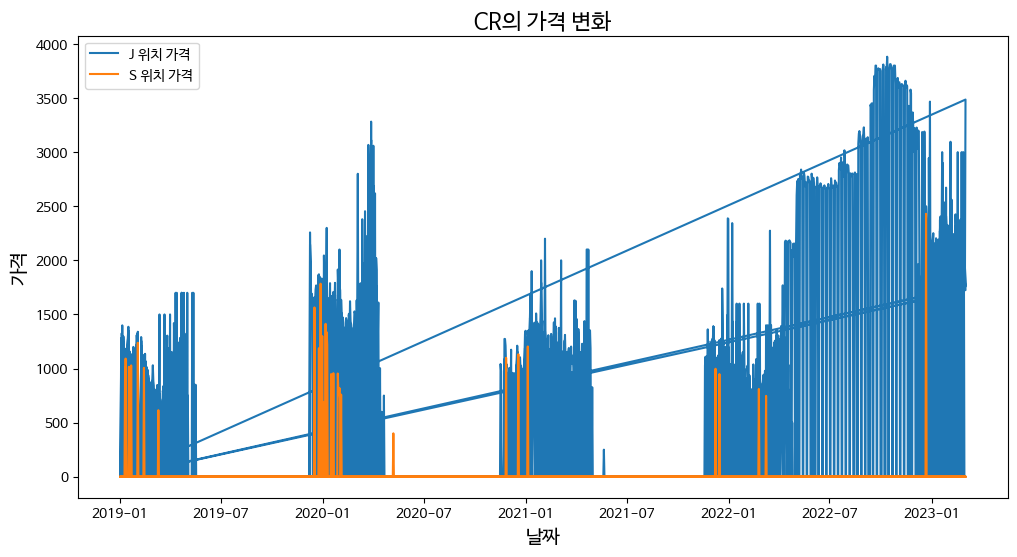

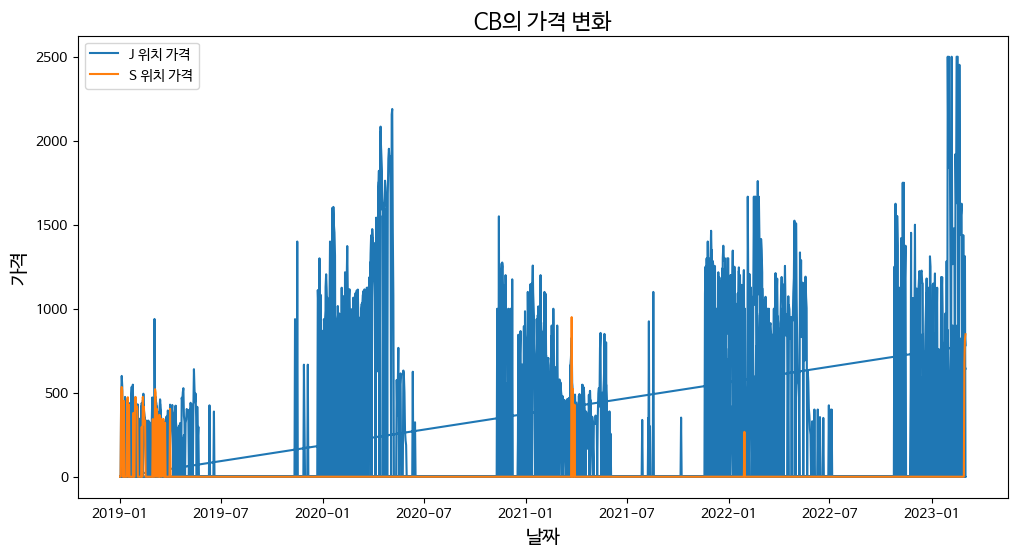

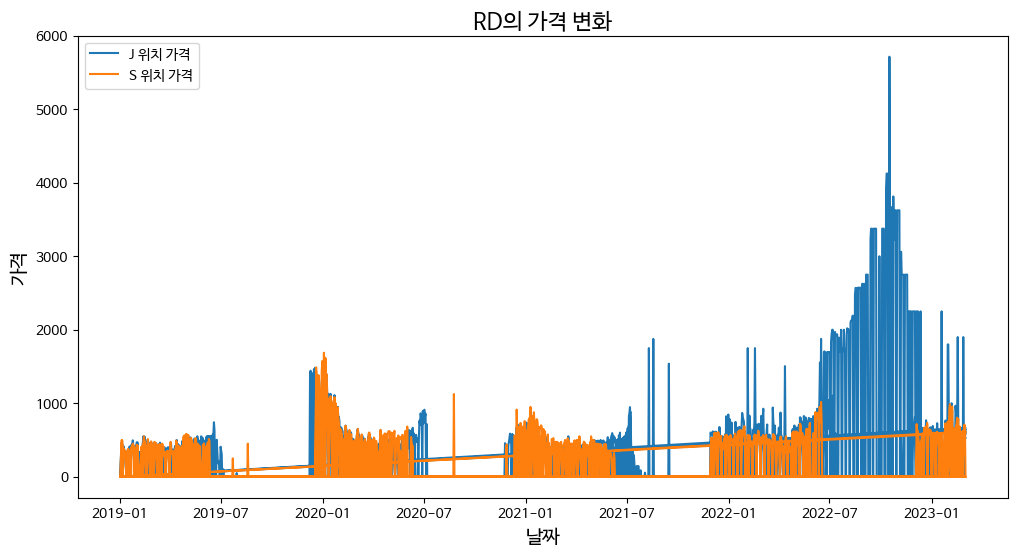

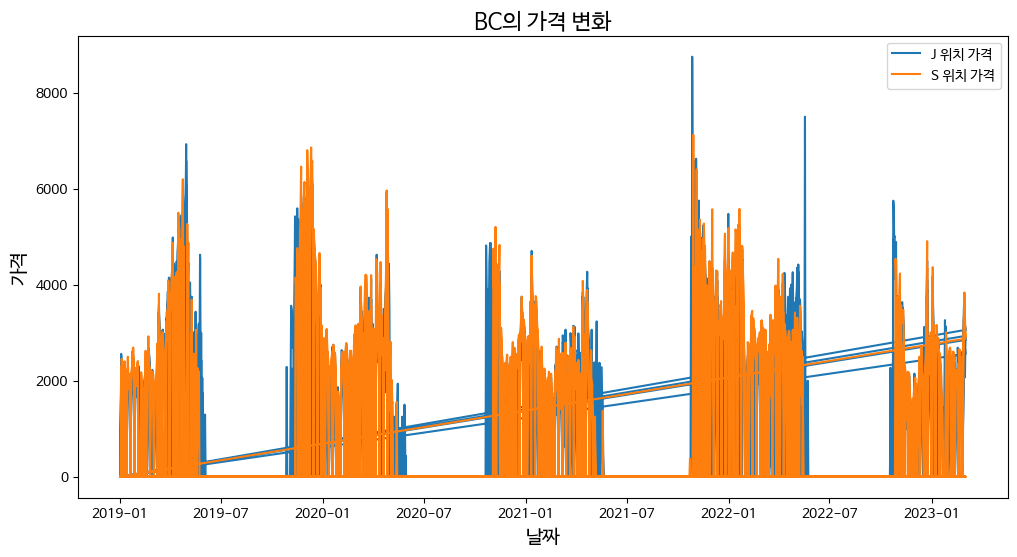

In [159]:
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

# 날짜 데이터를 datetime 형식으로 변환
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 각 과일 종류와 위치별로 데이터를 분리하여 시각화
fruit_types = df['item'].unique()
locations = df['location'].unique()

for fruit_type in fruit_types:
    plt.figure(figsize=(12, 6))

    for location in locations:
        # 해당 과일 및 위치의 데이터 추출
        fruit_location_data = df[(df['item'] == fruit_type) & (df['location'] == location)]

        # 날짜를 인덱스로 설정
        fruit_location_data.set_index('timestamp', inplace=True)

        # 시각화
        if not fruit_location_data['price(원/kg)'].dropna().empty:
            plt.plot(fruit_location_data['price(원/kg)'], label=f'{location} 위치 가격')

        # if not fruit_location_data['supply(kg)'].dropna().empty:
        #     plt.plot(fruit_location_data['supply(kg)'], label=f'{location} 위치 유통량')

    # 그래프 제목과 축 레이블 설정
    plt.title(f'{fruit_type}의 가격 변화', fontsize=16)
    plt.xlabel('날짜', fontsize=14)
    plt.ylabel('가격', fontsize=14)

    # 범례 추가
    plt.legend()

    # 그래프 표시
    plt.show()


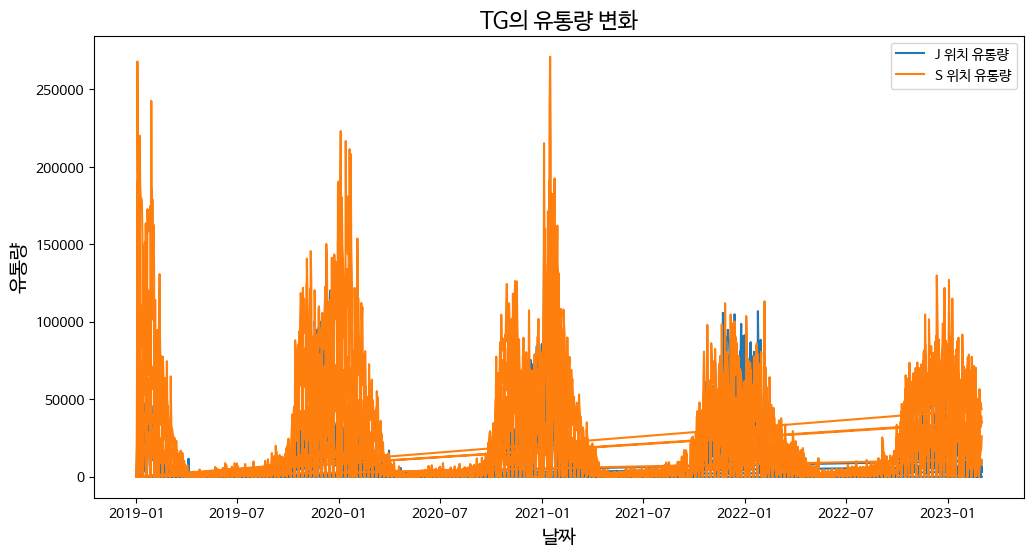

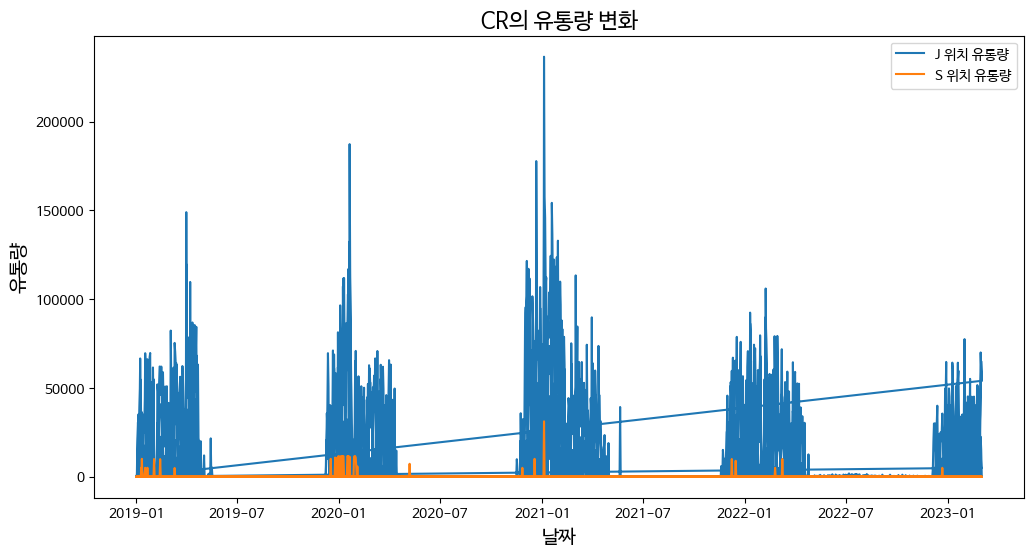

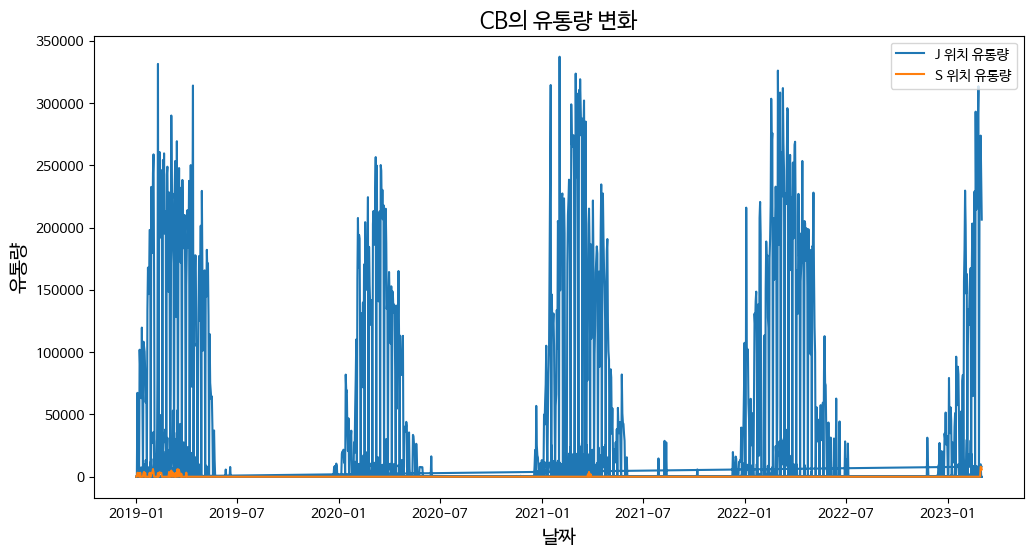

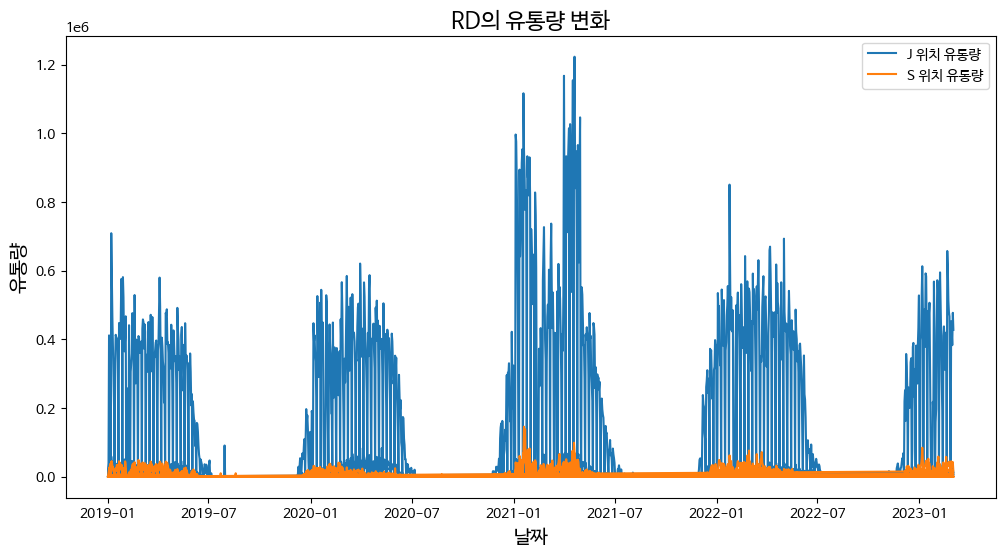

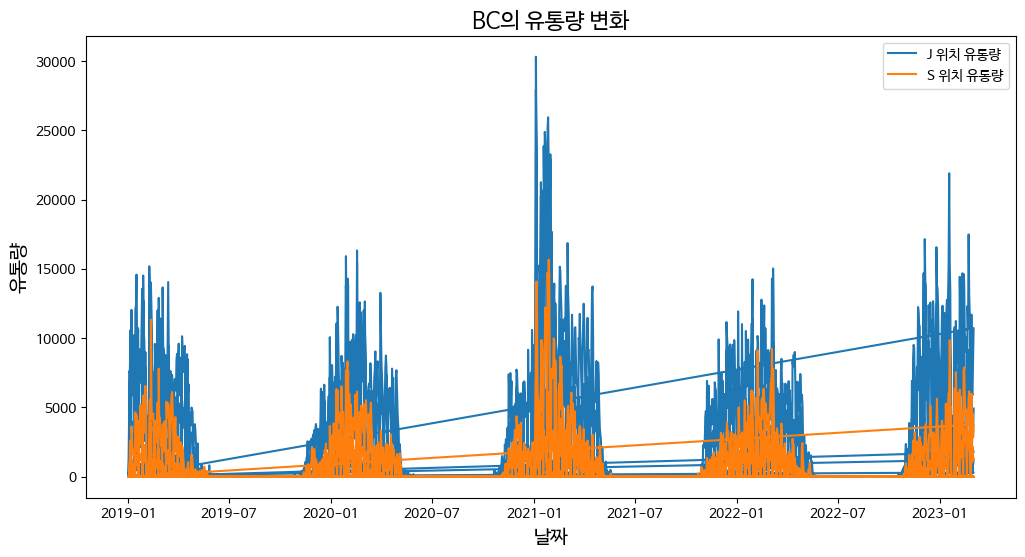

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'


# 날짜 데이터를 datetime 형식으로 변환
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 각 과일 종류와 위치별로 데이터를 분리하여 시각화
fruit_types = df['item'].unique()
locations = df['location'].unique()

for fruit_type in fruit_types:
    plt.figure(figsize=(12, 6))

    for location in locations:
        # 해당 과일 및 위치의 데이터 추출
        fruit_location_data = df[(df['item'] == fruit_type) & (df['location'] == location)]

        # 날짜를 인덱스로 설정
        fruit_location_data.set_index('timestamp', inplace=True)

        # 시각화
        if not fruit_location_data['supply(kg)'].dropna().empty:
            plt.plot(fruit_location_data['supply(kg)'], label=f'{location} 위치 유통량')

    # 그래프 제목과 축 레이블 설정
    plt.title(f'{fruit_type}의 유통량 변화', fontsize=16)
    plt.xlabel('날짜', fontsize=14)
    plt.ylabel('유통량', fontsize=14)

    # 범례 추가
    plt.legend()

    # 그래프 표시
    plt.show()


# supply가 0인 경우 제외해보기

In [161]:
df[df['supply(kg)']==0]

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
5,TG_A_J_20190106,2019-01-06,TG,A,J,0.0,0.0
12,TG_A_J_20190113,2019-01-13,TG,A,J,0.0,0.0
19,TG_A_J_20190120,2019-01-20,TG,A,J,0.0,0.0
...,...,...,...,...,...,...,...
59363,RD_F_J_20230129,2023-01-29,RD,F,J,0.0,0.0
59370,RD_F_J_20230205,2023-02-05,RD,F,J,0.0,0.0
59377,RD_F_J_20230212,2023-02-12,RD,F,J,0.0,0.0
59384,RD_F_J_20230219,2023-02-19,RD,F,J,0.0,0.0


In [162]:
len(df[df['supply(kg)']==0]) / len(df) # 0인 경우의 비율 확인

0.5968651615401451

In [163]:
supply_nozero = df[df['supply(kg)']!=0]

In [164]:
supply_nozero

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
6,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0
7,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


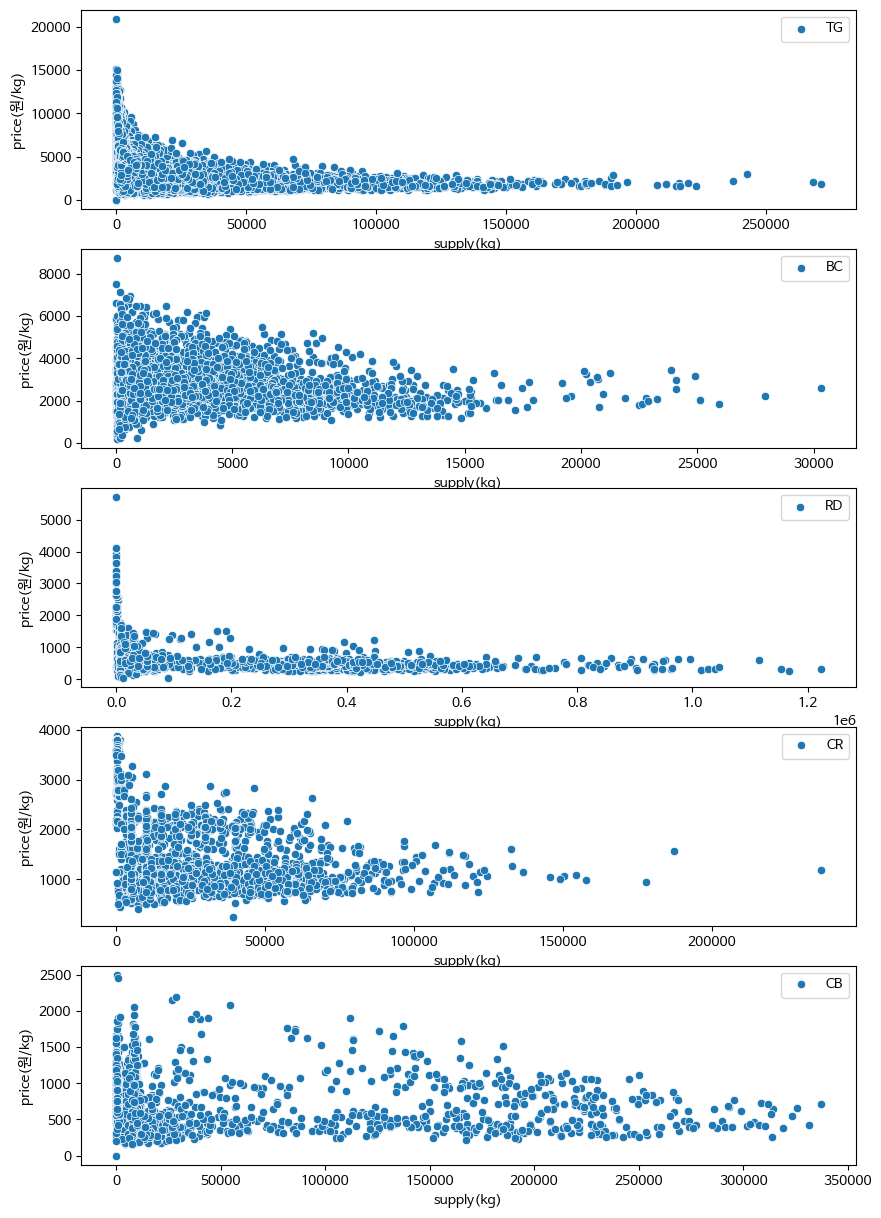

In [165]:
fig, axes = plt.subplots(5,1,figsize=(10,15))
for i in range(len(items)):
    r = i%5
    sns.scatterplot(data = supply_nozero[supply_nozero['item']==items[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[r],label=items[i])

# '년-월'로 묶기

In [166]:
supply_nozero['y-m']=supply_nozero['timestamp'].dt.strftime('%Y-%m')
supply_nozero['y-m']

2        2019-01
3        2019-01
4        2019-01
6        2019-01
7        2019-01
          ...   
59392    2023-02
59393    2023-02
59394    2023-03
59395    2023-03
59396    2023-03
Name: y-m, Length: 23945, dtype: object

## TG

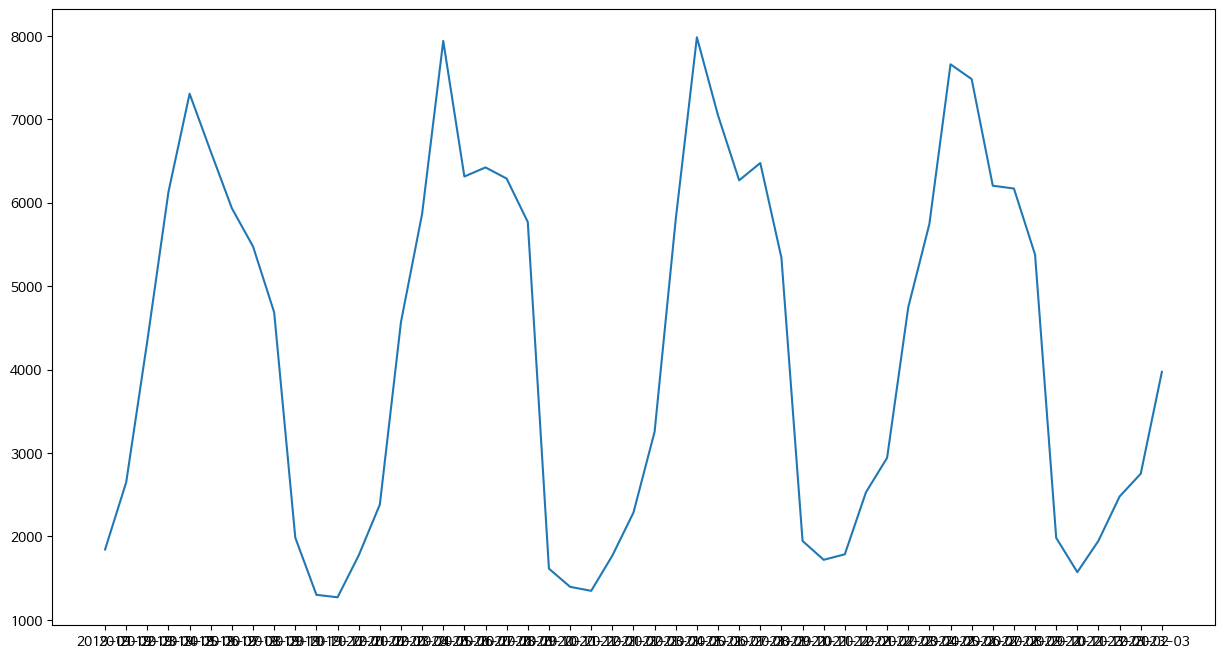

In [167]:
plt.figure(figsize=(15,8))
plt.plot(supply_nozero[supply_nozero['item'] == 'TG'].groupby(['y-m'])['price(원/kg)'].mean())

## BC

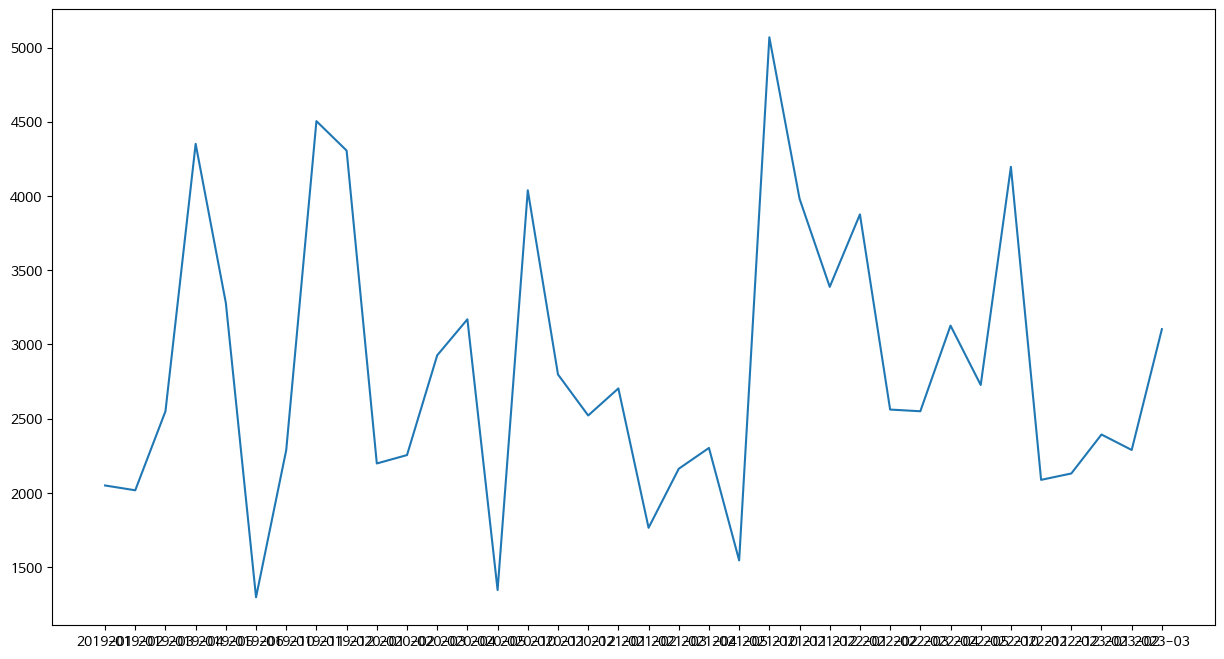

In [168]:
plt.figure(figsize=(15,8))
plt.plot(supply_nozero[supply_nozero['item'] == 'BC'].groupby(['y-m'])['price(원/kg)'].mean())

## RD

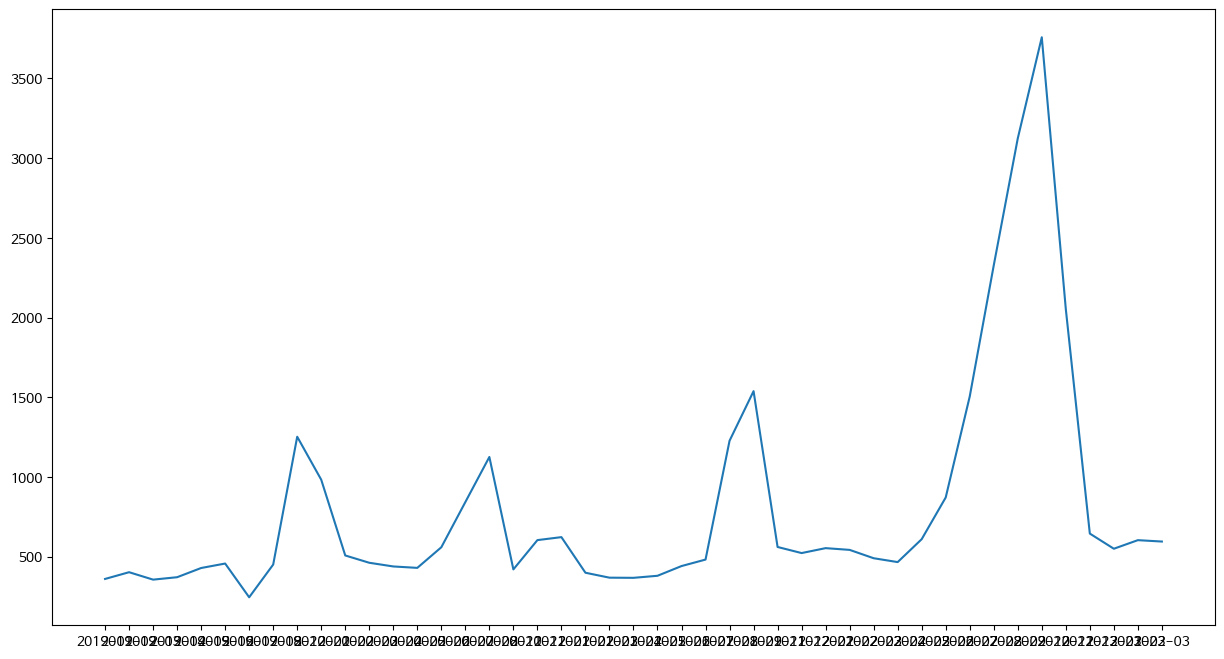

In [169]:
plt.figure(figsize=(15,8))
plt.plot(supply_nozero[supply_nozero['item'] == 'RD'].groupby(['y-m'])['price(원/kg)'].mean())

## CB

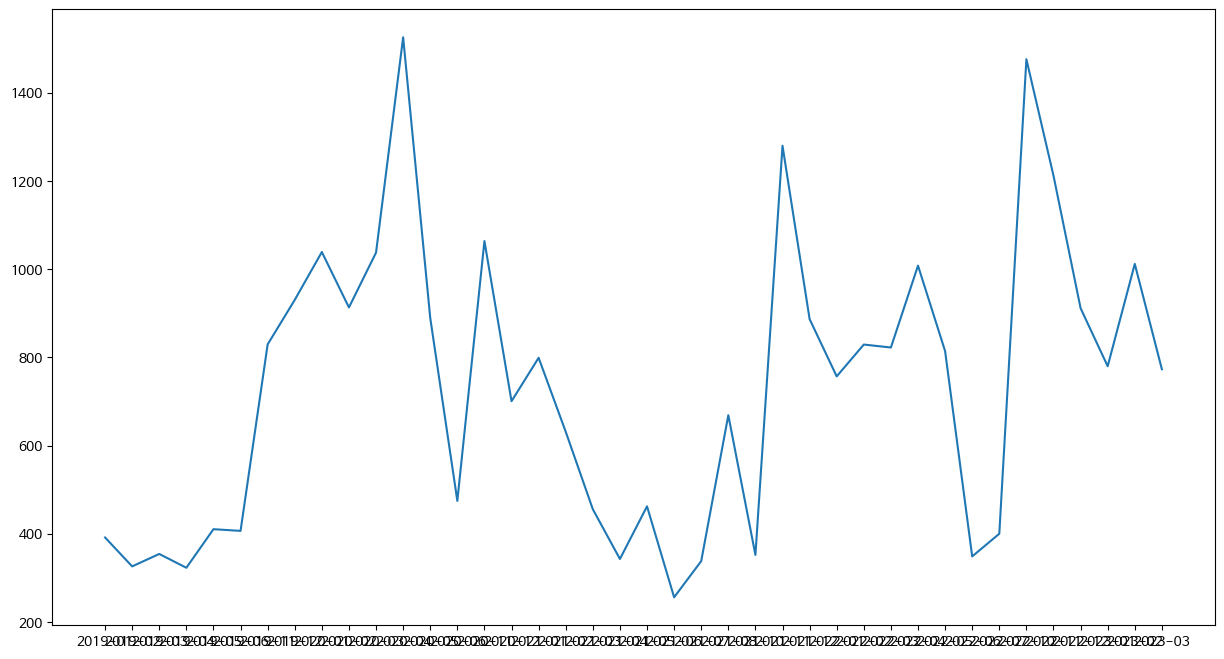

In [170]:
plt.figure(figsize=(15,8))
plt.plot(supply_nozero[supply_nozero['item'] == 'CB'].groupby(['y-m'])['price(원/kg)'].mean())

CR

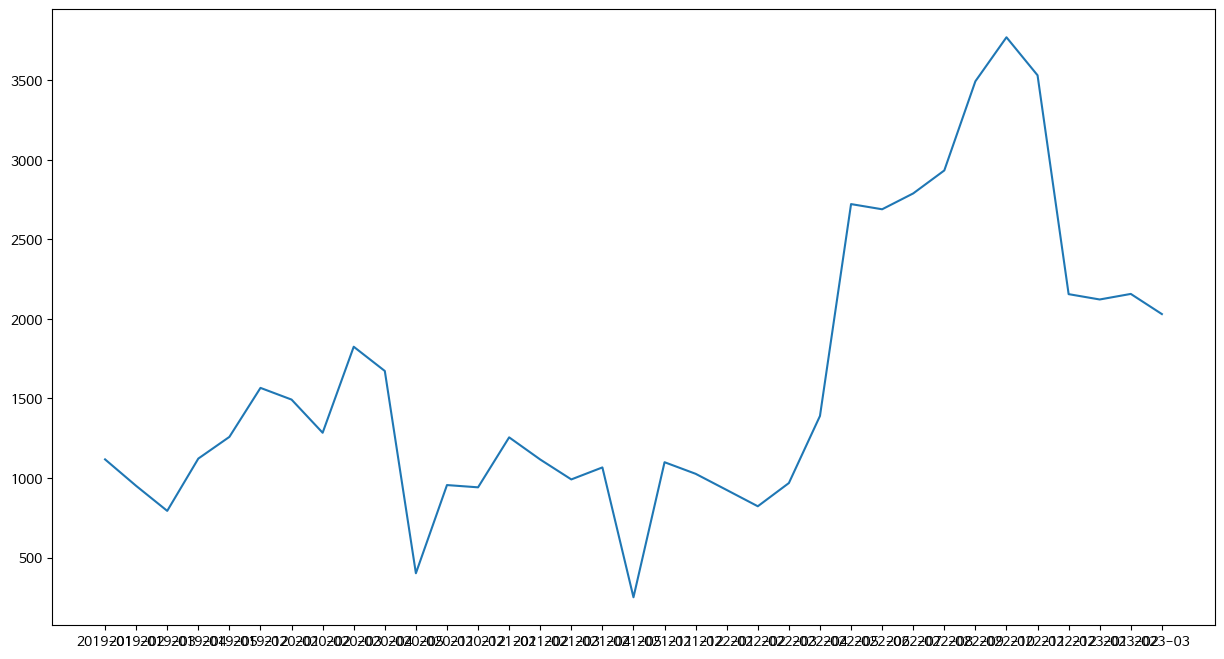

In [171]:
plt.figure(figsize=(15,8))
plt.plot(supply_nozero[supply_nozero['item'] == 'CR'].groupby(['y-m'])['price(원/kg)'].mean())

# 휴일 여부 추가

In [172]:
!pip install pytimekr

In [173]:
from pytimekr import pytimekr

year_2019 = pytimekr.holidays(year=2019)
year_2020 = pytimekr.holidays(year=2020)
year_2021 = pytimekr.holidays(year=2021)
year_2022 = pytimekr.holidays(year=2022)
year_2023 = pytimekr.holidays(year=2023)



def holidays(x):
    if x.weekday() in range(5,8):
        return 1
    if x.year == 2019  and x in year_2019 :
        return 1
    elif x.year == 2020 and x in year_2020:
        return 1
    elif x.year == 2021 and x in year_2021 :
        return 1
    elif x.year == 2022 and x in year_2022 :
        return 1
    elif x.year == 2023 and x in year_2023:
        return 1
    else:
        return 0

In [174]:
import warnings
warnings.filterwarnings('ignore')
df['holiday'] = df['timestamp'].apply(holidays)

In [175]:
df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),holiday
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,1
...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,0


In [176]:
df['holiday'].value_counts()

0    40872
1    18525
Name: holiday, dtype: int64

<Axes: xlabel='location', ylabel='price(원/kg)'>

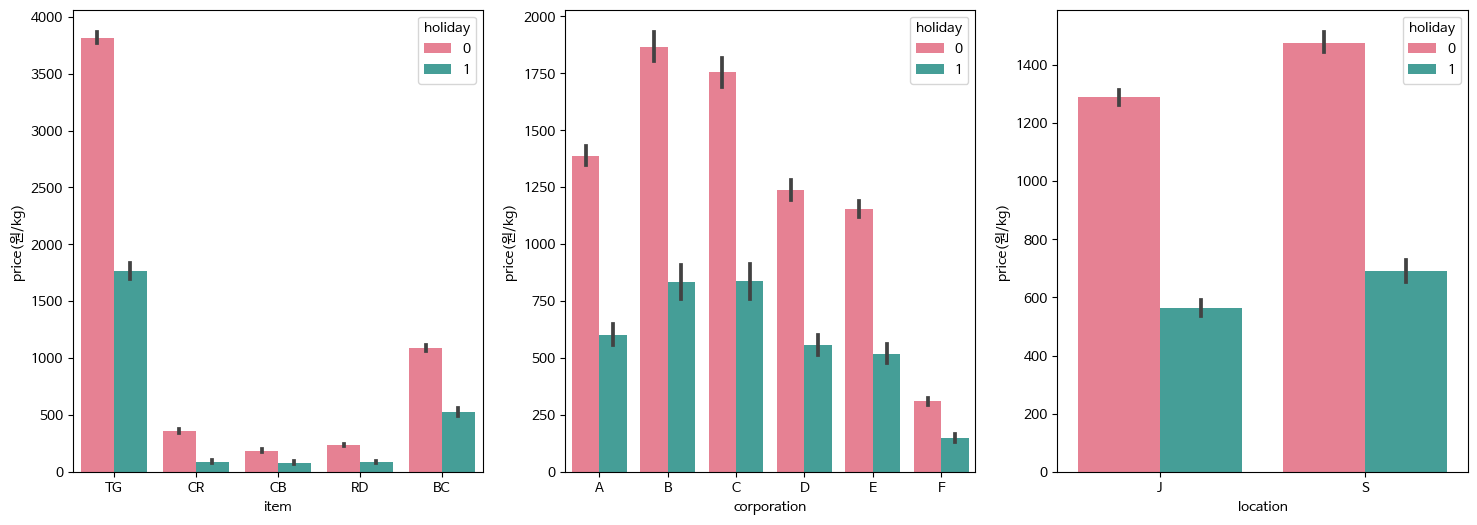

In [177]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=df,x='item',y='price(원/kg)',hue='holiday',ax=axes[0],palette='husl')
sns.barplot(data=df,x='corporation',y='price(원/kg)',hue='holiday',ax=axes[1],palette='husl')
sns.barplot(data=df,x='location',y='price(원/kg)',hue='holiday',ax=axes[2],palette='husl')

휴일인지 아닌지에 따라 차이가 있다고 판단

# price 왜도 첨도 확인

<Axes: xlabel='price(원/kg)', ylabel='Density'>

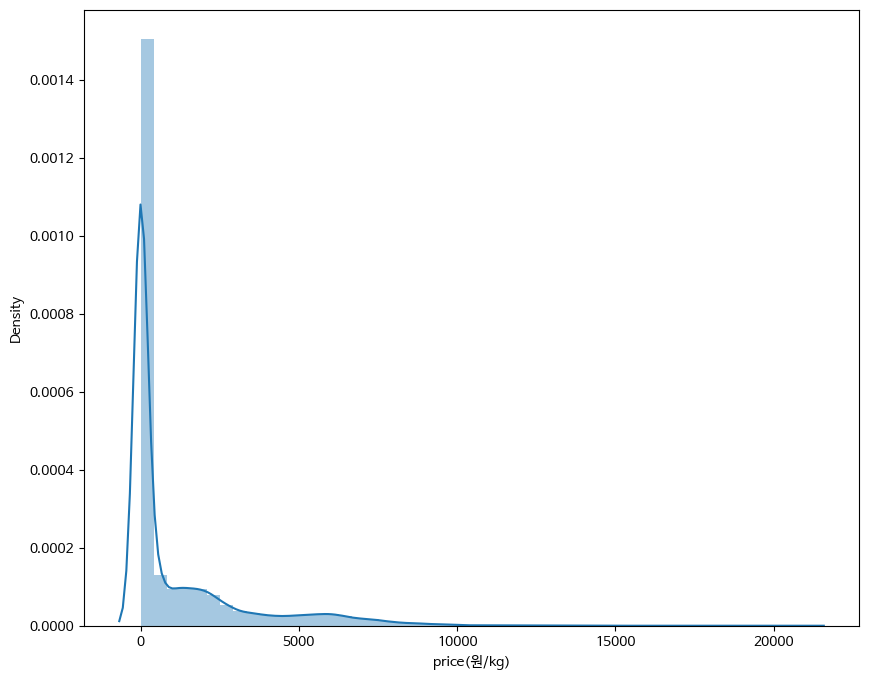

In [178]:
plt.figure(figsize=(10,8))
sns.distplot(df['price(원/kg)'])

<Axes: xlabel='price(원/kg)', ylabel='Density'>

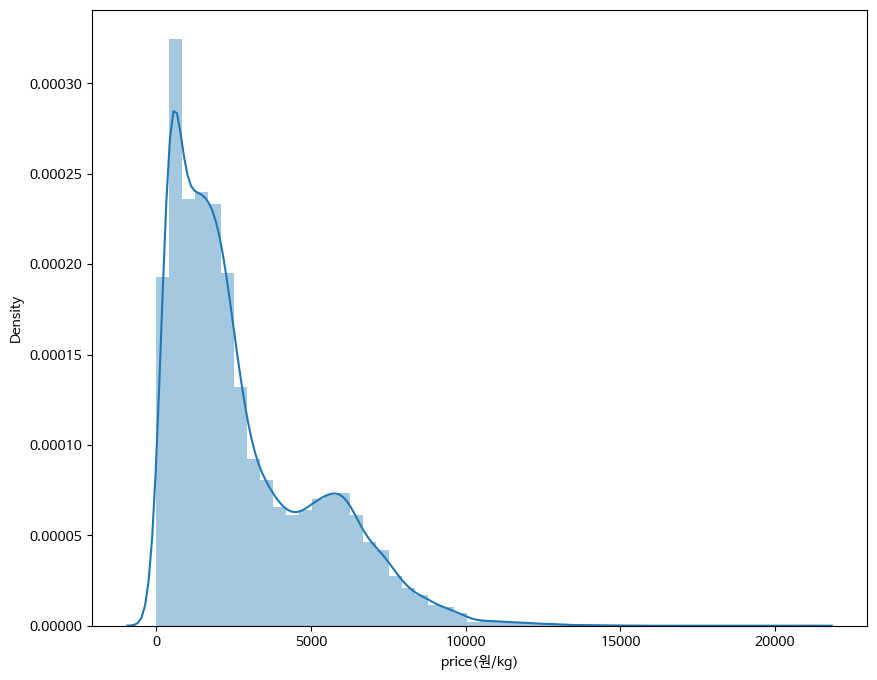

In [179]:
plt.figure(figsize=(10,8))
sns.distplot(supply_nozero['price(원/kg)'])

In [180]:
df['price(원/kg)'].skew(), supply_nozero['price(원/kg)'].skew()

(2.1854712324951593, 1.1612487018554112)

In [181]:
df['price(원/kg)'].kurt(), supply_nozero['price(원/kg)'].kurt()

(4.687441664325403, 0.929802378581118)

# 이상치 확인

<Axes: ylabel='price(원/kg)'>

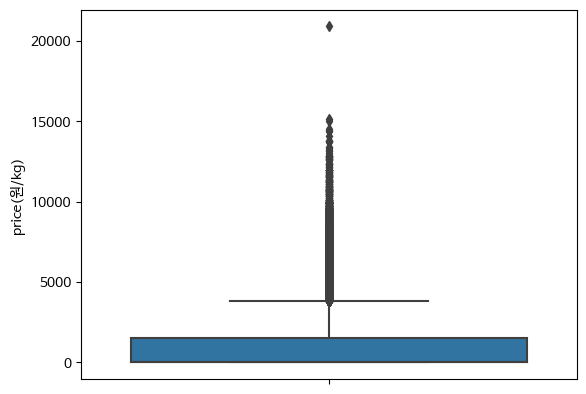

In [182]:
sns.boxplot(y='price(원/kg)',data=df)

<Axes: ylabel='price(원/kg)'>

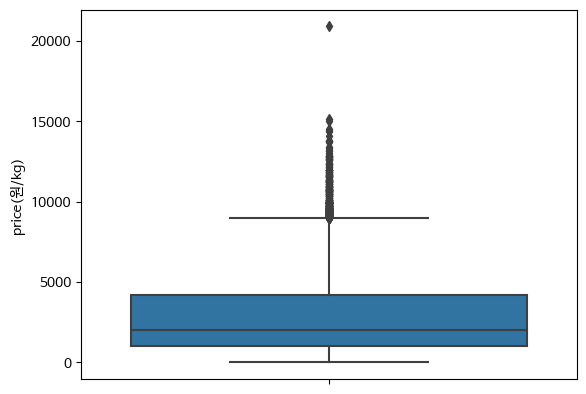

In [183]:
sns.boxplot(y='price(원/kg)',data=supply_nozero)

In [184]:
# 이상치제거함수
from collections import Counter
import numpy as np
def outlier(df,n,cols):
    outs = []
    for col in cols :
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1

        step = 1.5*IQR
        indexes = df[(df[col] < Q1 - step)|(df[col] > Q3 + step)].index
        outs.extend(indexes)
    outs = Counter(outs)
    res = [k for k,v in outs.items() if v > n]
    return res

In [185]:
outlier_col = ['supply(kg)','price(원/kg)']
outlier(df,2,outlier_col)
outlier(supply_nozero,2,outlier_col)

[]

In [186]:
df.columns

Index(['ID', 'timestamp', 'item', 'corporation', 'location', 'supply(kg)',
       'price(원/kg)', 'holiday'],
      dtype='object')

In [187]:
supply_nozero.columns

Index(['ID', 'timestamp', 'item', 'corporation', 'location', 'supply(kg)',
       'price(원/kg)', 'y-m'],
      dtype='object')

In [188]:
supply_nozero

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),y-m
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019-01
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019-01
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019-01
6,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0,2019-01
7,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0,2019-01
...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023-02
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023-02
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023-03
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023-03


In [189]:
supply_nozero.reset_index(inplace=True)

In [190]:
supply_nozero.drop('index',axis=1,inplace=True)
supply_nozero

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),y-m
0,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019-01
1,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019-01
2,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019-01
3,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0,2019-01
4,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0,2019-01
...,...,...,...,...,...,...,...,...
23940,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023-02
23941,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023-02
23942,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023-03
23943,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023-03


In [191]:
supply_nozero = supply_nozero[supply_nozero['price(원/kg)']!=0]

In [192]:
supply_nozero['holiday'] =supply_nozero['timestamp'].apply(holidays)
supply_nozero

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),y-m,holiday
0,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019-01,0
1,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019-01,0
2,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019-01,1
3,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0,2019-01,0
4,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0,2019-01,0
...,...,...,...,...,...,...,...,...,...
23940,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023-02,0
23941,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023-02,0
23942,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023-03,1
23943,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023-03,0


# trade.csv

In [193]:
filtered_trade

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
5,2019-01,양배추,184650,94,395802,90,4
8,2019-01,당근,23150,22,7466150,2955,-2934
17,2019-01,감귤,58368,172,0,0,172
...,...,...,...,...,...,...,...
1249,2023-02,방울다다기 양배추,71,1,10362,55,-55
1250,2023-02,양배추,13188,13,377456,104,-91
1253,2023-02,당근,22510,20,9260020,3758,-3737
1254,2023-02,순무,4000,4,2,0,4


In [194]:
filtered_trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 3 to 1264
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      256 non-null    object
 1   품목명     256 non-null    object
 2   수출 중량   256 non-null    int64 
 3   수출 금액   256 non-null    int64 
 4   수입 중량   256 non-null    int64 
 5   수입 금액   256 non-null    int64 
 6   무역수지    256 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 16.0+ KB


In [195]:
filtered_trade['품목명'].value_counts()

꽃양배추와 브로콜리(broccoli)    50
방울다다기 양배추               50
양배추                     50
당근                      50
감귤                      50
순무                       6
Name: 품목명, dtype: int64

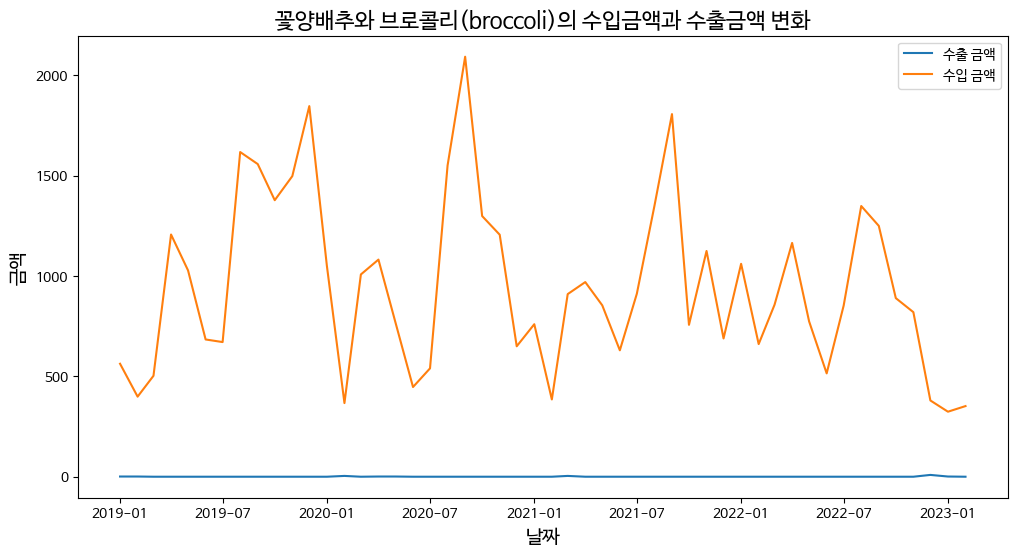

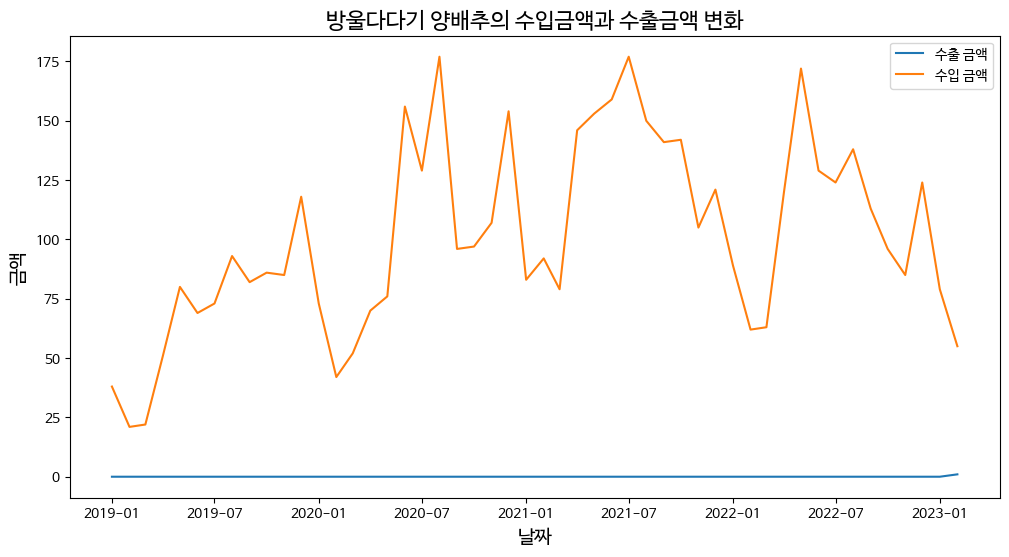

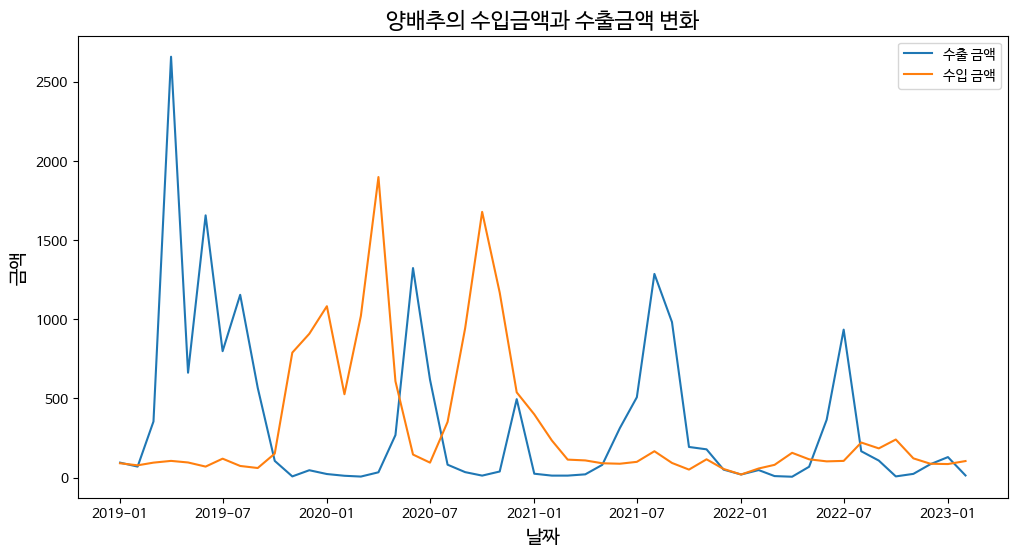

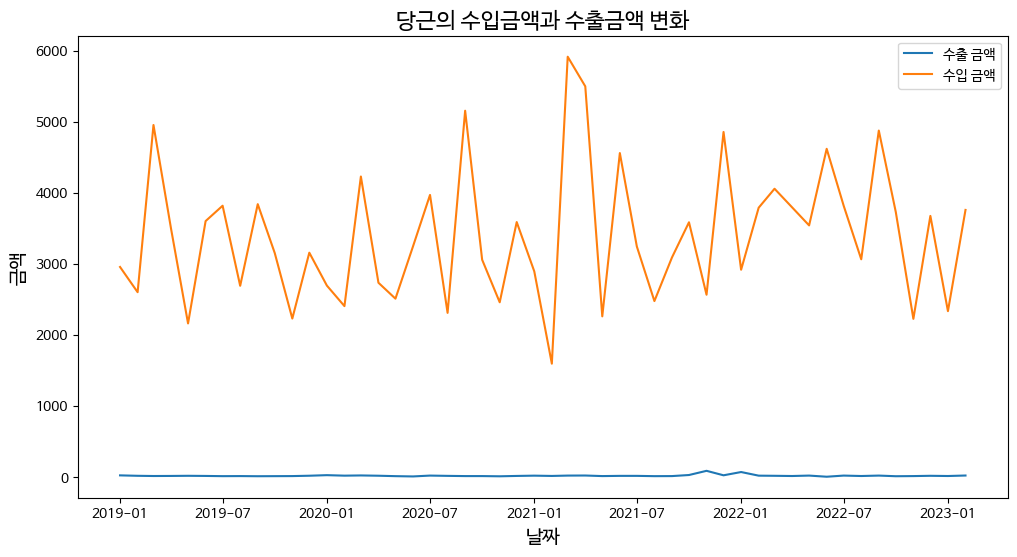

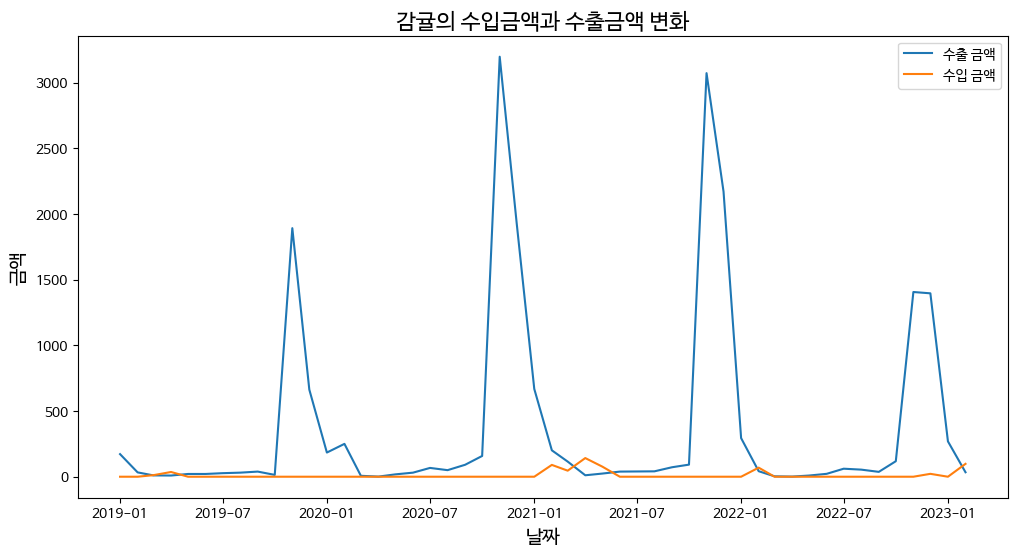

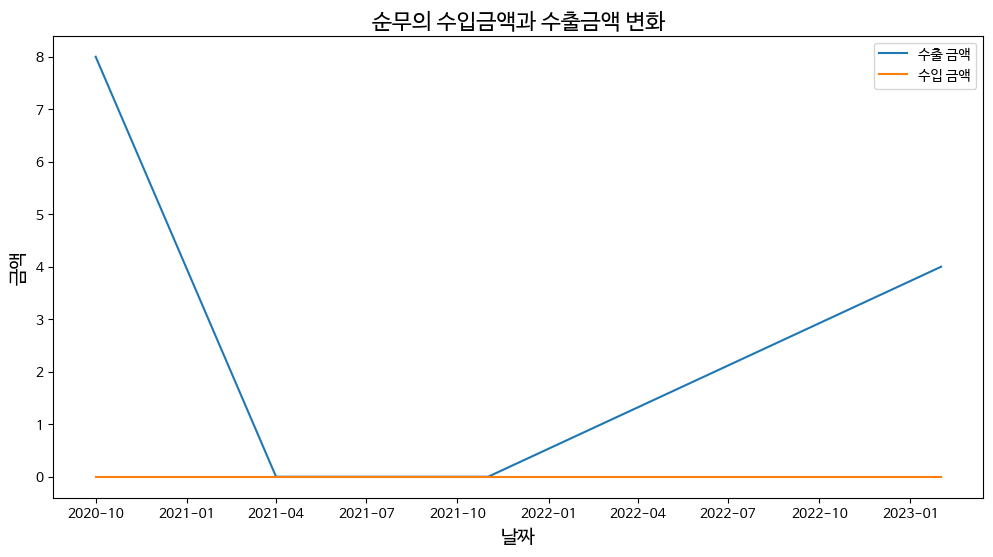

In [196]:
plt.rcParams['font.family'] = 'NanumBarunGothic'

# 날짜 데이터를 datetime 형식으로 변환
filtered_trade['기간'] = pd.to_datetime(filtered_trade['기간'])

# 각 품목별로 날짜순서대로 수입금액과 수출금액 그래프로 출력
for item in filtered_trade['품목명'].unique():
    plt.figure(figsize=(12, 6))

    # 해당 품목의 데이터 추출
    item_data = filtered_trade[filtered_trade['품목명'] == item]

    # 날짜를 인덱스로 설정
    item_data.set_index('기간', inplace=True)

    # 시각화
    if '수출 금액' in item_data.columns:
        plt.plot(item_data['수출 금액'], label='수출 금액')

    if '수입 금액' in item_data.columns:
        plt.plot(item_data['수입 금액'], label='수입 금액')

    # 그래프 제목과 축 레이블 설정
    plt.title(f'{item}의 수입금액과 수출금액 변화', fontsize=16)
    plt.xlabel('날짜', fontsize=14)
    plt.ylabel('금액', fontsize=14)

    # 범례 추가
    plt.legend()

    # 그래프 표시
    plt.show()


In [197]:
filtered_trade.loc[filtered_trade['품목명']=='꽃양배추와 브로콜리(broccoli)','품목명'] = '브로콜리'

In [198]:
filtered_trade.loc[filtered_trade['품목명']=='방울다다기 양배추','품목명'] = '양배추'

In [199]:
filtered_trade.loc[filtered_trade['품목명']=='순무','품목명'] = '무'
filtered_trade

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
3,2019-01-01,브로콜리,160,1,638913,563,-562
4,2019-01-01,양배추,0,0,7580,38,-38
5,2019-01-01,양배추,184650,94,395802,90,4
8,2019-01-01,당근,23150,22,7466150,2955,-2934
17,2019-01-01,감귤,58368,172,0,0,172
...,...,...,...,...,...,...,...
1249,2023-02-01,양배추,71,1,10362,55,-55
1250,2023-02-01,양배추,13188,13,377456,104,-91
1253,2023-02-01,당근,22510,20,9260020,3758,-3737
1254,2023-02-01,무,4000,4,2,0,4


In [200]:
fruits_dict = {'감귤':'TG' ,'브로콜리':'BC' ,'무':'RD' ,'당근':'CR' ,'양배추':'CB'}

In [201]:
filtered_trade['품목명'] = filtered_trade['품목명'].map(fruits_dict)

In [205]:
filtered_trade.reset_index()

,index,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,3,2019-01-01,BC,160,1,638913,563,-562
1,4,2019-01-01,CB,0,0,7580,38,-38
2,5,2019-01-01,CB,184650,94,395802,90,4
3,8,2019-01-01,CR,23150,22,7466150,2955,-2934
4,17,2019-01-01,TG,58368,172,0,0,172
...,...,...,...,...,...,...,...,...
251,1249,2023-02-01,CB,71,1,10362,55,-55
252,1250,2023-02-01,CB,13188,13,377456,104,-91
253,1253,2023-02-01,CR,22510,20,9260020,3758,-3737
254,1254,2023-02-01,RD,4000,4,2,0,4


In [207]:
filtered_trade[filtered_trade.duplicated()]

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지


In [209]:
filtered_trade.isna().sum()

기간       0
품목명      0
수출 중량    0
수출 금액    0
수입 중량    0
수입 금액    0
무역수지     0
dtype: int64

In [210]:
box_plot_cols = filtered_trade.columns[2:-1]

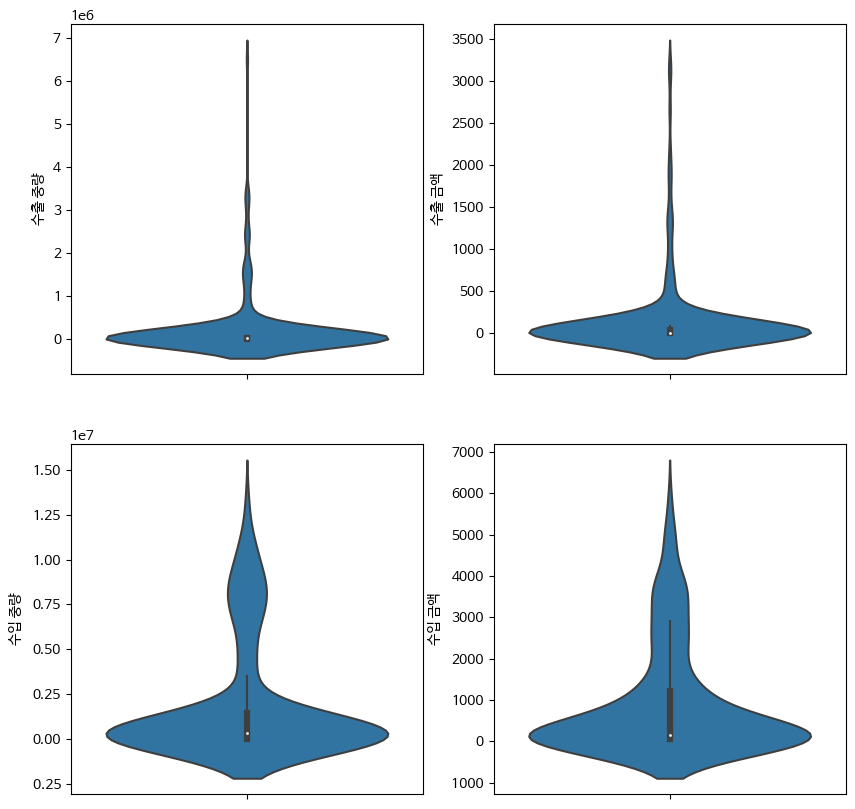

In [212]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
for i in range(len(box_plot_cols)):
    n=int(i/2)
    r = i%2
    sns.violinplot(data=filtered_trade,y=box_plot_cols[i],ax=axes[n][r],hue='품목명')

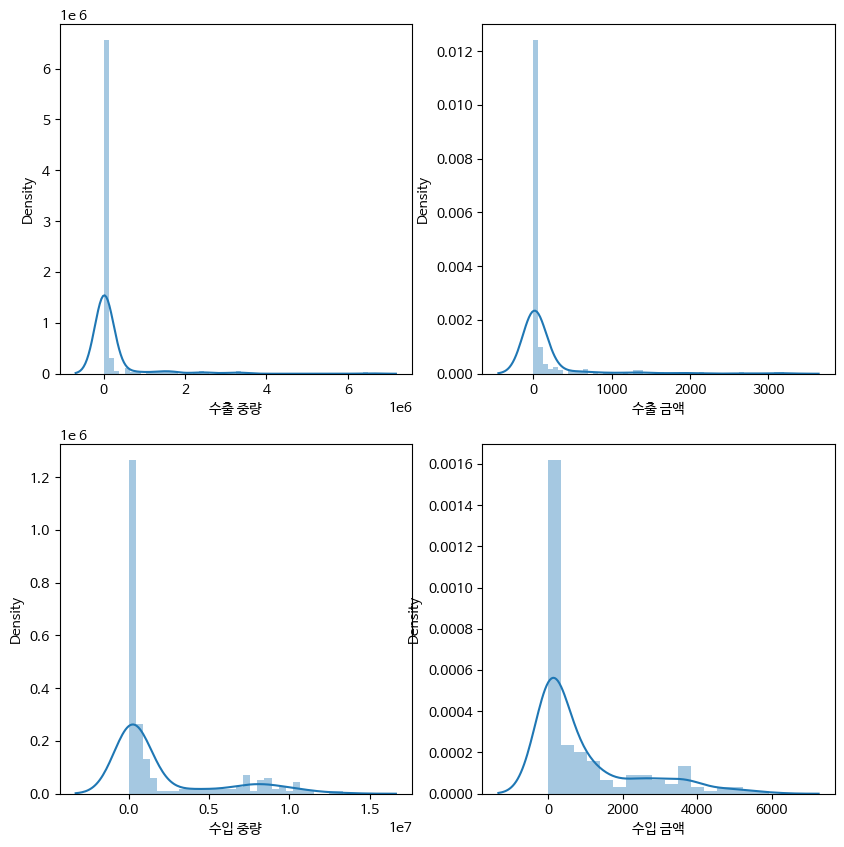

In [213]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
for i in range(len(box_plot_cols)):
    n=int(i/2)
    r = i%2
    sns.distplot(filtered_trade[box_plot_cols[i]],ax=axes[n][r])

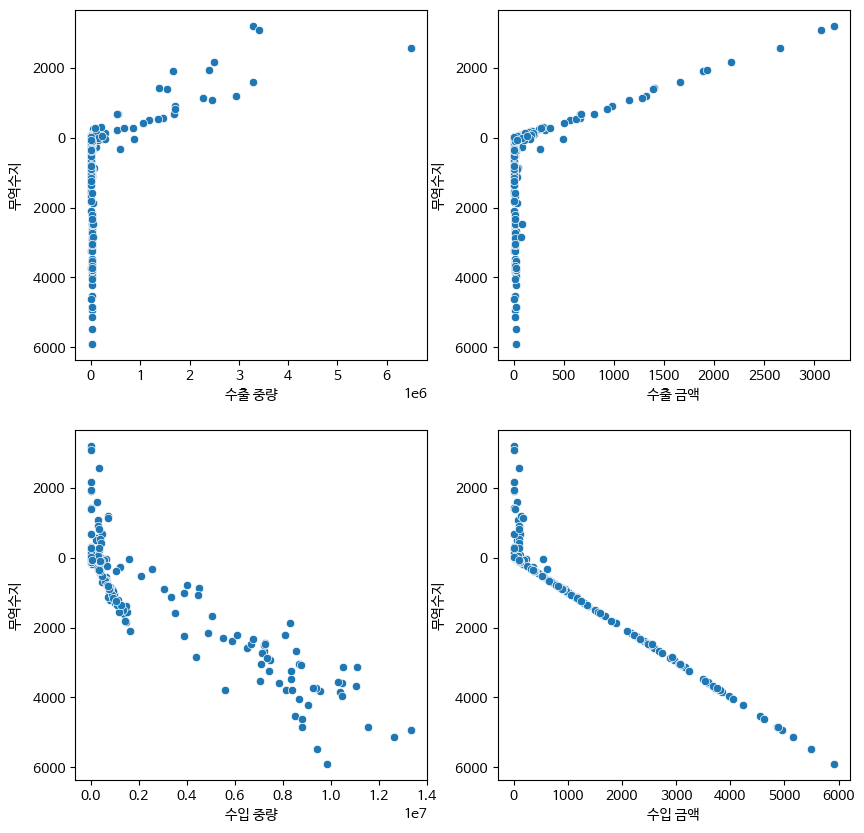

In [214]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
for i in range(len(box_plot_cols)):
    n=int(i/2)
    r = i%2
    sns.scatterplot(data=filtered_trade,x=box_plot_cols[i],y='무역수지',ax=axes[n][r])

In [215]:
filtered_trade.loc[outlier(filtered_trade,2,['수출 중량', '수출 금액', '수입 중량', '수입 금액', '무역수지'])]

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
77,2019-04-01,CB,6494616,2658,343463,105,2553
273,2019-11-01,TG,1663839,1892,1,0,1892
570,2020-11-01,TG,3289766,3197,0,0,3197
592,2020-12-01,TG,2396213,1928,0,0,1928
870,2021-11-01,TG,3399820,3072,0,0,3072
895,2021-12-01,TG,2502702,2170,0,0,2170
56,2019-03-01,CR,17960,13,13353720,4953,-4941
80,2019-04-01,CR,16910,14,8323700,3493,-3479
130,2019-06-01,CR,19500,14,7853590,3601,-3587
158,2019-07-01,CR,17000,11,9570280,3817,-3806


In [216]:
dropindex = outlier(filtered_trade,2,['수출 중량', '수출 금액', '수입 중량', '수입 금액', '무역수지'])
filtered_trade.drop(dropindex,inplace=True)

In [217]:
filtered_trade.reset_index(inplace=True)

In [219]:
filtered_trade.drop('index', axis=1, inplace=True)

In [220]:
filtered_trade

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01-01,BC,160,1,638913,563,-562
1,2019-01-01,CB,0,0,7580,38,-38
2,2019-01-01,CB,184650,94,395802,90,4
3,2019-01-01,CR,23150,22,7466150,2955,-2934
4,2019-01-01,TG,58368,172,0,0,172
...,...,...,...,...,...,...,...
215,2023-02-01,BC,24,0,332640,352,-352
216,2023-02-01,CB,71,1,10362,55,-55
217,2023-02-01,CB,13188,13,377456,104,-91
218,2023-02-01,RD,4000,4,2,0,4


In [221]:
supply_nozero.to_csv('train_data.csv', index=False)

In [222]:
filtered_trade.to_csv('trade.csv', index=False)